In [1]:
import numpy as np

from cifar_functions import *

X_train, X_test, Y_train, Y_test, sensitive, sensitive_t = data_train_test_cifar()

2025-03-03 11:30:42.716868: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 11:30:43.255825: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 11:31:09.791000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import matplotlib.pyplot as plt

def plot_history(history, dist=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy ({"" if dist == None else dist*100}% old)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

In [2]:
X_train.shape

(30000, 32, 32, 3)

In [3]:
Y_train.shape

TensorShape([30000, 10])

In [4]:
from common.functions import *

In [6]:
model, history = fit_lucasnet(X_train, Y_train, X_test, Y_test, verbose=1, input_shape=(32, 32, 3), num_classes=10)

2024-03-17 17:28:19.754622: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 368640000 exceeds 10% of free system memory.


Epoch 1/5
937/938 [============================>.] - ETA: 0s - loss: 1.3786 - accuracy: 0.5150

2024-03-17 17:28:45.888029: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 368640000 exceeds 10% of free system memory.


938/938 [==============================] - 35s 33ms/step - loss: 1.3785 - accuracy: 0.5151 - val_loss: 1.1407 - val_accuracy: 0.5924
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.9873 - accuracy: 0.6524 - val_loss: 0.9022 - val_accuracy: 0.6855
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.8265 - accuracy: 0.7097 - val_loss: 0.8990 - val_accuracy: 0.6853
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.7208 - accuracy: 0.7471 - val_loss: 0.8163 - val_accuracy: 0.7201
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.6330 - accuracy: 0.7769 - val_loss: 0.8186 - val_accuracy: 0.7213


In [8]:
Y_train[3]

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [7]:
import keras

cifar100 = keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [8]:

y_train.shape

(50000, 1)

In [9]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [1]:
from cifar_functions import get_cifar_input_set

x, y = get_cifar_input_set()

2024-02-27 17:47:08.853590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 17:47:08.853718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 17:47:08.915711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 17:47:09.046325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 17:47:10.102645: W tensorflow/compiler/tf2

In [2]:
x.shape

(18000, 32, 32, 3)

In [3]:
y.shape

(18000, 1)

In [1]:
from cifar_functions import *
distributed_datasets = get_distributed_cifar_sets(distributions=[0.7,0.8,0.9])

2024-02-28 10:27:50.475194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:27:50.475259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:27:50.477290: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:27:50.490027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-28 10:27:51.354480: W tensorflow/compiler/tf2

now computing dist 0.7
now computing dist 0.8
now computing dist 0.9


In [2]:
for ds in distributed_datasets:
    print(ds.y_train.shape)

(17142, 10)
(15000, 10)
(13333, 10)


In [1]:
from cifar_functions import get_distributed_cifar_sets, get_cifar_input_set
from common.functions import train_shadow_models

2024-02-29 10:01:29.508875: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 10:01:29.571705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:01:29.571745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:01:29.571788: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 10:01:29.583407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 10:01:29.584408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
base_path = "cifar"  # for saving models and output data
test_run = True
n_shadow_models = 2
distributions = [0.1]#, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
save_models = False
input_shape = (32, 32, 3)
num_classes = 10
model_input = get_cifar_input_set()
distributed_datasets = get_distributed_cifar_sets(distributions=distributions)

now computing dist 0.1


In [4]:
from common.functions import generate_shadow_model_outputs
ds = distributed_datasets[0]
load_model_path = f"{base_path}/models/shadow_models/{str(ds.distribution)}/{'test' if test_run else 'train'}/"

save_model_path = None
outputs = generate_shadow_model_outputs(ds, model_input, load_model_path, save_model_path, n_shadow_models=n_shadow_models, use_test_data=test_run, input_shape=input_shape, num_classes=num_classes)


In [5]:
outputs.shape
#adv_df = pd.DataFrame(outputs)

(2, 16200)

# Adversary

In [5]:
import pandas as pd
from joblib import Parallel, delayed

def load_and_concat(dist):
    a = pd.read_csv(f"cifar/data/shadow_model_outputs/{dist}/train.csv")
    b = pd.read_csv(f"cifar_new/data/shadow_model_outputs/{dist}/train.csv")
    return pd.concat([a,b])

dists = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

all_train = [load_and_concat(dist) for dist in dists]
adv_train = pd.concat(all_train)

adv_test = [pd.read_csv(f"cifar_new_new/data/shadow_model_outputs/{dist}/test.csv") for dist in dists]
adv_test = pd.concat(adv_test)

In [6]:
adv_y = adv_train["y"]
adv_X = adv_train.drop(columns=["y"])
adv_y_test = adv_test["y"]
adv_X_test = adv_test.drop(columns=["y"])

In [7]:
adv_X.shape

(3600, 45360)

In [8]:
adv_X_test.shape

(900, 45360)

units_dense0: 36
relu_dense0: True
units_dense1: 8
relu_dense1: True
batch_size: 24

In [17]:
import keras
from keras import regularizers

def create_and_compile(input_shape):
    manual_adversary = keras.Sequential()
    manual_adversary.add(keras.Input(shape=input_shape))
    manual_adversary.add(keras.layers.Dense(30, activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)))
    manual_adversary.add(keras.layers.Dropout(0.05))
    manual_adversary.add(keras.layers.Dense(8, activation='relu'))#, kernel_regularizer=regularizers.l2(0.04)))
    manual_adversary.add(keras.layers.Dense(1))
    manual_adversary.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.R2Score()])
    return manual_adversary

In [16]:
old_adv = create_and_compile((adv_X.shape[1],))
old_adv.load_weights("cifar/models/cifar-adv_0.64_test_r2.keras")

/informatik2/svs/home/stock/anaconda3/envs/pia-tf2/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 13 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [12]:
checkpoint_filepath = "cifar/models/manual_tuning_checkpoints_v2/keras.weights.h5"

currentmax = 0.5
for i in range(100):
    manual_adversary = create_and_compile((adv_X.shape[1],))
    history = manual_adversary.fit(
        adv_X,
        adv_y,
        epochs=200,
        validation_data=(adv_X_test, adv_y_test),
        batch_size=18,
        verbose=0,
        callbacks=[
            keras.callbacks.EarlyStopping('val_r2_score', mode='max', patience=20, verbose=1),
            keras.callbacks.ModelCheckpoint(
                filepath=checkpoint_filepath,
                save_weights_only=True,
                monitor='val_r2_score',
                mode='max',
                save_best_only=True)
        ])
    newmax = max(history.history['val_r2_score'])
    if newmax > currentmax:
        print(f"new max r2: {newmax}")
        currentmax = newmax
        manual_adversary.load_weights(checkpoint_filepath)
        manual_adversary.save(f"cifar/models/cifar_adv_v2_{round(newmax, 2)}_test_r2.keras")

Epoch 23: early stopping
new max r2: 0.5919499397277832
Epoch 23: early stopping
new max r2: 0.6009912490844727
Epoch 21: early stopping
new max r2: 0.6123344898223877
Epoch 22: early stopping
Epoch 32: early stopping
Epoch 26: early stopping


KeyboardInterrupt: 

In [13]:
advv = keras.models.load_model("cifar/models/cifar_adv_v2_0.61_test_r2.keras")

In [ ]:
adversary = keras.models.load_model("cifar/models/cifar-adv_0.64_test_r2.keras")

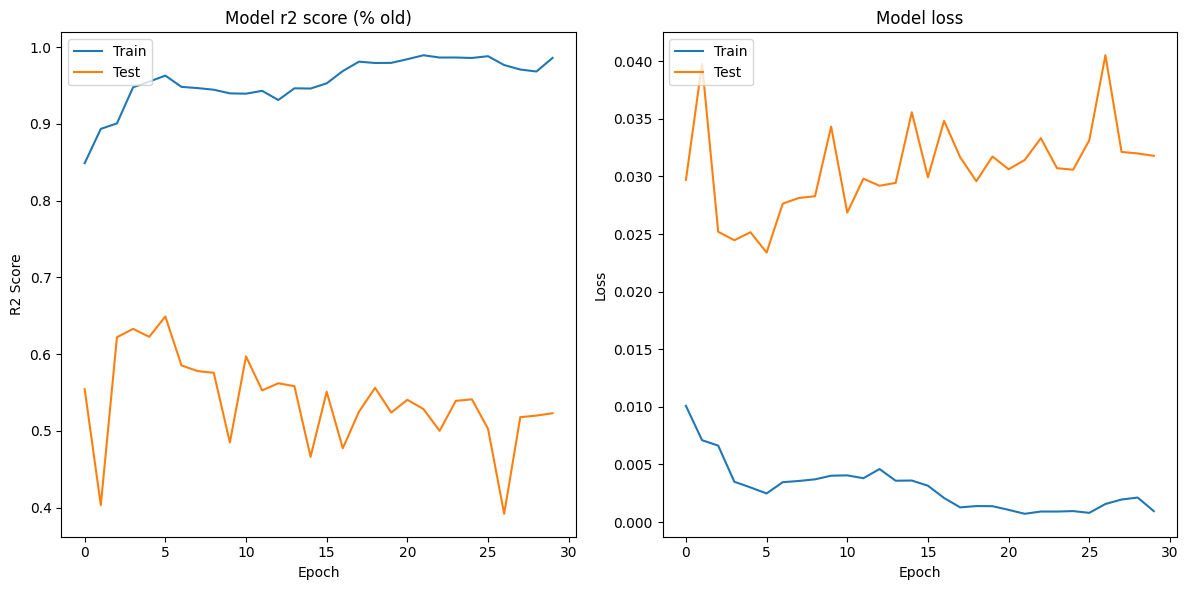

In [24]:
plot_history(history)

In [12]:
import matplotlib.pyplot as plt
def plot_history(history, dist=None):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['r2_score'][1:])
    plt.plot(history.history['val_r2_score'][1:])
    plt.title(f'Model r2 score ({"" if dist == None else dist*100}% old)')
    plt.ylabel('R2 Score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.tight_layout()

In [15]:
manual_adversary.load_weights("cifar/models/manual_tuning_checkpoints/keras.weights.h5")

In [16]:
manual_adversary.evaluate(adv_X_test, adv_y_test)

29/29 [==============================] - 1s 13ms/step - loss: 0.0240 - r2_score: 0.6400


[0.024002226069569588, 0.639966607093811]

In [17]:
manual_adversary.save("cifar/models/cifar-adv_0.64_test_r2.keras")

In [18]:
manual_adversary = create_and_compile((adv_X.shape[1],))

In [19]:
manual_adversary.load_weights("cifar/models/cifar-adv_0.64_test_r2.keras")

In [5]:
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch

2024-03-13 08:55:43.485370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 08:55:43.486715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 08:55:43.536194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 08:55:43.617277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 08:55:44.765050: W tensorflow/compiler/tf2

In [9]:
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Dense(hp.Int('units_dense0', min_value=24, max_value=40, step=4)))
        if hp.Boolean("relu_dense0"):
            model.add(keras.layers.Activation(keras.activations.relu))
        #model.add(keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.01, max_value=0.03, step=0.01)))
        model.add(keras.layers.Dense(hp.Int('units_dense1', min_value=6, max_value=14, step=2)))
        if hp.Boolean("relu_dense1"):
            model.add(keras.layers.Activation(keras.activations.relu))
        model.add(keras.layers.Dense(1))
        model.compile(optimizer="adam", loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.R2Score()])
        return model
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [10, 18, 24]),
            **kwargs,
        )


In [10]:
from keras_tuner import Objective
tuner = RandomSearch(
    MyHyperModel(),
    #objective=keras_tuner.Objective('val_r2_score', direction='max'),
    objective = Objective(name="val_r2_score", direction="max"),
    max_trials = 50,
    executions_per_trial = 4,
    tuner_id="17.01.regression.adversary.cgpt"
)

In [11]:
tuner.search(adv_X, adv_y, epochs=200, validation_data=(adv_X_test, adv_y_test), callbacks=[keras.callbacks.EarlyStopping('val_r2_score', mode='max', patience=20),])

Trial 50 Complete [00h 05m 06s]
val_r2_score: 0.4704882949590683

Best val_r2_score So Far: 0.6202707141637802
Total elapsed time: 04h 41m 16s


In [12]:
models = tuner.get_best_models(num_models=5)

/home/jstock/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:394: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [13]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_r2_score", direction="max")

Trial 10 summary
Hyperparameters:
units_dense0: 36
relu_dense0: True
units_dense1: 8
relu_dense1: True
batch_size: 24
Score: 0.6202707141637802

Trial 42 summary
Hyperparameters:
units_dense0: 28
relu_dense0: True
units_dense1: 10
relu_dense1: True
batch_size: 18
Score: 0.6037189066410065

Trial 29 summary
Hyperparameters:
units_dense0: 24
relu_dense0: False
units_dense1: 14
relu_dense1: True
batch_size: 18
Score: 0.5935608893632889

Trial 39 summary
Hyperparameters:
units_dense0: 32
relu_dense0: False
units_dense1: 14
relu_dense1: False
batch_size: 10
Score: 0.5910771191120148

Trial 48 summary
Hyperparameters:
units_dense0: 24
relu_dense0: False
units_dense1: 12
relu_dense1: True
batch_size: 10
Score: 0.5906173139810562

Trial 20 summary
Hyperparameters:
units_dense0: 40
relu_dense0: False
units_dense1: 12
relu_dense1: True
batch_size: 10
Score: 0.5887070596218109

Tr

In [14]:
best_model = models[0]

In [15]:
best_model.build(input_shape=(None,adv_X.shape[1],))

In [18]:
best_model.save("cifar/models/cifar-adv_0.62_test_r2.keras")

In [15]:
import keras
adversary = keras.models.load_model("cifar/models/cifar-adv_0.64_test_r2.keras")

In [2]:
from cifar_functions import get_cifar_input_set

model_input = get_cifar_input_set()

In [7]:
pred = model.predict(model_input)

158/158 [==============================] - 2s 11ms/step


In [8]:
pred.shape

(5040, 10)

In [9]:
y_pred_for_adv = pred[:, 0:pred.shape[1]-1].flatten()

In [10]:
my_x = tf.reshape(y_pred_for_adv, (1, y_pred_for_adv.shape[0]))

In [11]:
my_x.shape

TensorShape([1, 45360])

In [12]:
adv_pred = adversary.predict(my_x)

1/1 [==============================] - 0s 76ms/step


In [15]:
adv_pred.shape


(1, 1)

## Test if defense works for multiple adversaries

In [9]:
from cifar_functions import get_cifar_input_set, get_distributed_cifar_sets
distributed_datasets = get_distributed_cifar_sets(distributions=[0.1, 0.9])

now computing dist 0.1


/export/home/stock/git/bb-pia/src/common/functions.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (pd.Series(sensitive).value_counts()[1] - len(indices_to_drop)) / (length - len(indices_to_drop))


now computing dist 0.9


/export/home/stock/git/bb-pia/src/common/functions.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (pd.Series(sensitive).value_counts()[1] - len(indices_to_drop)) / (length - len(indices_to_drop))
/export/home/stock/git/bb-pia/src/common/functions.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (pd.Series(sensitive).value_counts()[1]) / (length - len(indices_to_drop))


In [10]:
model_input = get_cifar_input_set()

In [11]:
from common.functions import get_defending_lucasnet_model, compile_categorical_model, ensure_path_exists

training_lambda = 0.15
run = 0
ds=distributed_datasets[0]

model = get_defending_lucasnet_model(
    adversary=adversary,
    adversary_target=0.5,
    input_for_adversary=model_input,
    training_lambda=training_lambda,
    num_classes=10,
    input_shape=(32, 32, 3))

model = compile_categorical_model(model)
model_history = model.fit(
    ds.X_test,
    ds.y_test,
    epochs=4,
    validation_data=(ds.X_train, ds.y_train),
    batch_size=32,
    #callbacks=[tboard_callback],
    verbose=1)
#model.save_inner_model(f"{save_path}cifardef-ds{ds.distribution}-l{training_lambda}-run{run}.keras")

NameError: name 'adversary' is not defined

In [21]:
from keras.layers import Flatten
output = model.predict(model_input)
num_columns = output.shape[1]-1
output = output[:, 0:num_columns]
output = Flatten()(output)
# reshape as model input
my_x = tf.reshape(output, (1, output.shape[0]*output.shape[1]))
# get adversary prediction
adv_out = adversary(my_x).numpy().flatten()[0]
test_acc = model.evaluate(ds.X_train, ds.y_train)

625/625 [==============================] - 5s 7ms/step - loss: 0.8575 - accuracy: 0.7040 - adversary_prediction: 0.0000e+00


In [28]:
adv2 = create_and_compile((adv_X.shape[1],))

In [29]:
adv2.load_weights("cifar/models/cifar_adv_v2_0.61_test_r2.keras")
# oder aus manual_tuning_checkpoints

In [30]:
adv_out2 = adv2(my_x).numpy().flatten()[0]

In [31]:
print(f"1st adversary after defense: {round(adv_out, 3)}, 2nd: {round(adv_out2, 3)}")

1st adversary after defense: 0.5099999904632568, 2nd: 0.47699999809265137
